# Project case: Apprentice Chef
## Classification-based machine learning project using supervised learning techniques

1. <b>Project assigned by:</b>  Chase Kusterer
2. <b>Project completed by:</b> Arseniy Barmin
3. <b>Project duration:</b> January 2020 - February 2020

Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home. Developed for the busy professional that has little to no skills in the kitchen, they offer a wide selection of daily-prepared gourmet meals delivered directly to your door. Each meal set takes at most 30 minutes to finish cooking at home and also comes with Apprentice Chef's award-winning disposable cookware (i.e. pots, pans, baking trays, and utensils), allowing for fast and easy cleanup. Ordering meals is very easy given their user-friendly online platform and mobile app.

___

### Case Context

In an effort to diversify their revenue stream, Apprentice Chef, Inc. has launched Halfway There, a cross-selling promotion where subscribers receive a half bottle of wine from a local California vineyard every Wednesday (halfway through the work week). The executives at Apprentice Chef also believe this endeavor will create a competitive advantage based on its unique product offering of hard to find local wines. 

Halfway There has been exclusively offered to all of the customers in the dataset I received, and the executives would like to promote this service to a wider audience. They have tasked me to:

1. Analyze the data
2. Develop my top insights
3. Build a machine learning model to predict which customers will subscribe to the Halfway There service

In order to appropriately prepare the data for this analysis, the data science team at Apprentice Chef has queried, sampled, and verified a dataset of approximately 2,000 customers. Each customer met at least one of the following criteria:

1. At least one purchase per month for a total of 11 of their first 12 months
2. At least one purchase per quarter and at least 15 purchases throughout their first year

The data science team assures me that their dataset engineering techniques are statistically sound and represent the true picture of Apprentice Chef’s customers. To help me in my task, Apprentice Chef, Inc. has provided me with the dataset and additional information about the company.

___

### The business question

Build a machine learning model to predict which customers will subscribe to the Halfway There service

___

### Libraries and file upload
Before I begin and throughout this project, I will be adding the libraries I will be using in the code block below. First, I always upload the following 3 libraries before beginning my work:

1. <b>Pandas as pd </b> for essential data science tools
2. <b>Matplotlib.pyplot as plt</b> for essential graphical output
3. <b>Seaborn as sns</b> for enhanced visualizations

The rest of the libraries I will need throughout this analysis will be added to this code block one by one.

In [1]:
# LIBRARIES #
import pandas as pd                                              # data science essentials
import matplotlib.pyplot as plt                                  # essential graphical output
import seaborn as sns                                            # enhanced graphical output

import statsmodels.formula.api as smf                            # regression modeling
from sklearn.model_selection import train_test_split             # importing train_test_split
from sklearn.neighbors import KNeighborsRegressor                # KNN for Regression
from sklearn.preprocessing import StandardScaler                 # standard scaler
from sklearn.linear_model import LinearRegression                # importing linear regression
from sklearn.linear_model import RidgeClassifier                 # importing Ridge Classifier
import sklearn.linear_model                                      # importing sklearn
from sklearn.tree import DecisionTreeRegressor                   # importing Decision Tree Regressor
import random            as rand                                 # random number gen
from sklearn.linear_model import LogisticRegression              # logistic regression
from sklearn.metrics import confusion_matrix                     # confusion matrix
from sklearn.metrics import roc_auc_score                        # auc score
from sklearn.neighbors import KNeighborsClassifier               # KNN for classification
from sklearn.tree import DecisionTreeClassifier                  # classification trees
from sklearn.tree import export_graphviz                         # exports graphics
from sklearn.externals.six import StringIO                       # saves objects in memory
from IPython.display import Image                                # displays on frontend
import pydotplus                                                 # interprets dot objects
from sklearn.gaussian_process import GaussianProcessClassifier   # importing Gaussian Process Classifier

/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Now that the libraries are loaded, I will read in the Excel file from the working directory into Python. In addition, I will specify pandas print options to ensure that I will be able to output and view information on all variables, rather than first several and last several.

In [2]:
# FILE UPLOAD #

# Reading in the dataset into Python
file = 'Apprentice_Chef_Dataset.xlsx'  # specifying file name
my_df = pd.read_excel(file)            # reading the file into Python

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Initial data exploration

Now that the file is loaded, I will next analyze the structure of my data, its variable types, and other information to gain first impression of the dataset.

In [3]:
# FIRST IMPRESSION #
my_df.info()  # learning about the infomration I have on each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

There are 2 important insights I am observing:
1. <b> Dataset contains 4 categorical variables </b>\
Because machine learning models only accept numeric variables, I will have to decide how to treat the 4 variables of class "object"


2. <b> Dataset contains missing values </b>\
The "FAMILY_NAME" variable contains 1899 observations, whereas other columns contain 1946. Another prerequisite for machine learning models to work properly is to have a dataset with no missing values. Therefore, I will have to analyze these missing values to identify the best way to treat them.

I will consider what to do with the 4 variables of class "object" later. Next, I would like to analyze the missing values in the dataset. For sanity check, in the next code block I want to see the number of missing values per variable in my dataset.

In [4]:
# MISSING VALUES ANALYSIS #
my_df.isnull().sum()      # analyzing the number of missing values per variable in the datase

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

For sanity check, I verified I was correct; only the "FAMILY_NAME" variable contains missing values. My business question is to <b> to predict which customers will subscribe to the Halfway There service</b>. 

My common sense tells me that a customer's family name is irrelevant to predicting subscription to a new service. However, I also acknowledge that missing values can potentially reveal valuable information later in the analysis. Therefore, I will create a new variable to flag my missing values.

In [5]:
# creating a for loop to flag missing values
for col in my_df:
    if my_df[col].isnull().astype(int).sum() > 0:
        my_df['m_' + col] = my_df[col].isnull().astype(int)

# checking to see if the solution worked
my_df

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98,0
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0,0


After running the loop to flag missing values by creating a new column using the "m_column_name" format, I printed my results for sanity check. A new column flagging missing values was created, and as the last step I will run another for loop to see if all missing values are accounted for.

In [6]:
# making a more formal check
a = my_df.isnull().sum().sum()
b = my_df.iloc[ :, -1: ].sum().sum()

if a == b:
    print('\nAll missing values are accounted for')
else:
    print('\nSome missing values may be unaccounted for, please audit')


All missing values are accounted for


My for loop states that all missing values have been accounted for.

I treated all missing values by flagging them using new variables, but the dataset still contains 47 missing values. Because all the missing values are located in the "FAMILY_NAME" column, I will drop them all. My business question is to <b>predict which customers will subscribe to the Halfway There service</b>. Hence, my common sense tells me that it is illogical to hypothesize that a person's family name can help predict a person's likelihood to subscribe to a new service. 

Conclusively, I will next drop the missing values from our dataset. 

In [7]:
# creating a Data Frame after dropping missing values to from original data 
my_df_dropped = my_df.dropna() 

For sanity check, I next want to make sure my dataset contains no more missing values.

In [8]:
# Counting the number of missing values in the entire dataset
my_df_dropped.isnull().sum().sum()

0

Now that I am assured my dataset contains no missing values, I will next analyze the descriptive statistics of each numeric variable.

In [9]:
# FIRST IMPRESSION #
my_df.describe().round(2) # describing and analyzing each quantitative column

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43,0.02
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01,0.15
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00,0.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00,1.00


Based on the output, I notice several interesting observations:

1. <b>There difference between revenue generated by the top 25% of customers and the rest is very large.</b>

75% of Apprentice Chef's customers generate between \\$131 and \\$2670 in revenue. The top 25% of customers generate between \\$2670 and \\$8800. This is a big range, and based on this information, I assume that we don't only have individual consumers, but may also have corporate consumers to whom we cater large orders. If this would be a real-world situation, I would next study our customer base in details. Because this is a project, having this assumption in mind is already a notable observation. 

2. <b>There difference between total meals ordered by the top 25% of customers and the rest is exponential.</b>

Since this is a project and not a real-world work, I don't have the resources to analyze Apprentice Chef's customer base in details. However, this observation solidifies my first assumption based on distribution of values in the "REVENUE" column; the company likely has individual and corporate customers. The mean for total meals ordered is 75, and the 3rd quartile of customers orders around 95 meals. The top 25% of customers order up to 493 meals; a huge increase compared to the 75th percentile of customers. Conclusively, I now strongly believe  we both individuals and businesses.

3. <b>Numeric variables vary in their shape.</b>

Some numeric variables greatly range in values, because some are continuous, and some are binary. This means that certain columns communicate range in values, and some may communicate a <i> Yes or No </i> kind of information. Therefore, it is important to take a closer look at each column to enhance my domain knowledge, and to also explore the metadata.

4. <b>This dataset is rich with outliers.</b>

As mentioned, the "REVENUE" and "TOTAL_MEALS_ORDERED" variables substantially differ in distribution of their values between the top 25% of customers and the rest. These 2 columns, along with several others, indicate the presence of outliers. This is an important insight, because outliers can potentially have a strong influence on predicting a person's likelihood to subscribing to a new service. This insight directs me to the next phase of my analysis - outlier analysis. 

___

### Feature engineering - Outlier analysis

Before beginning my outlier analysis, I first want to make sure that I save my file back to Excel in my working directory. I concluded my data exploration, made certain adjustments to dataset, so it is a good practice to safe my work frequently as I progress further.

In [10]:
# Saving dataset with dropped missing values
my_df_dropped.to_excel('Apprentice_Chef_Dataset_dropped.xlsx', index = False)

Outlier analysis is an important step in preparing my data for machine learning. 

Later in this project, I will be analyzing the relationship between my response variable - REVENUE - and other variables from the dataset. To do this well, I will create several new columns to flag outliers that are present in existing columns. Currently, many variables have a certain range where most values are located. The minority of values located to the left and to the right of that majority range is where outliers are found.

Outliers can communicate important information, and can potentially prove to be statistically significant in predicting revenue just by themselves. Therefore, it is a good practice to place lower and upper outliers in their own columns. That way, when I analyze statistical significance of each column against my response variable - REVENUE - outliers will be analyzed as thoroughly as the ranges that contain majority values. Otherwise, when outliers and majority values are analyzed together for statistical significance, outliers may not be considered as equally. This means I may miss out on considering important information, which I wish to avoid.

Soon, I will create a code to visualize the distribution of values for each numeric variable. Before I do that, I will show my approach to analyzing one plot from the dataset for possible lower and upper outliers. Below is the code that visualizes the distribution of values for my example variable - AVG_CLICKS_PER_VISIT.

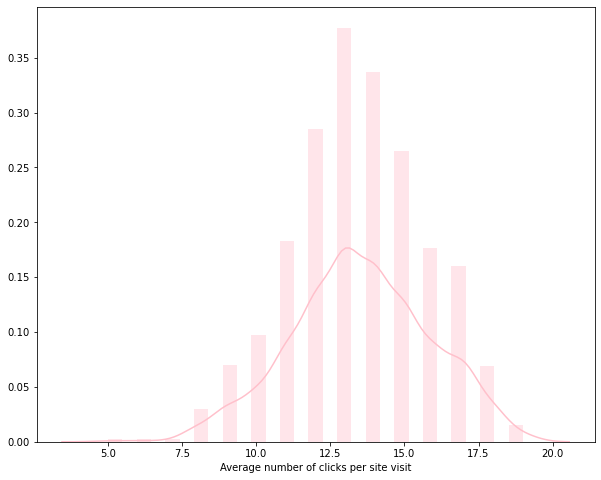

In [11]:
# Example plot - avg_clicks_per_visit
fig, ax = plt.subplots(figsize = (10, 8))
sns.distplot(my_df_dropped['AVG_CLICKS_PER_VISIT'], bins = 'fd', color = 'pink')
plt.xlabel('Average number of clicks per site visit')
plt.show()

I will use the same approach to analyze each numeric variable for possible lower and upper outliers. Before I plot all numeric variables, I will show my thought process of analyzing an example variable - AVG_CLICKS_PER_VISIT.

<b>Example variable analysis - AVG_CLICKS_PER_VISIT</b>

The distribution of values in this variable appears to have the majority of values in the range between around 10 and around 18. Therefore, I intuitively mark this range as the majority range with values [10:18]. There are not nearly as many values located to the left and to the right of this range. Therefore, I identufy the region [0:10) as a region containing lower outliers, and the region (18:19] as a region containing upper outliers. To summarize

- Range [10:18] is the majority range I subjectively identify 
- Range [0:10) is my left (lower) outlier range I subjectively identify
- Range (18:19] is my right (upper) outlier range I subjectively identify

Using the approach described on an example variable above, I will analyze the remaining plots in a similar fashion. The code block below creates a plot to visualize distribution of values for each numeric variable.

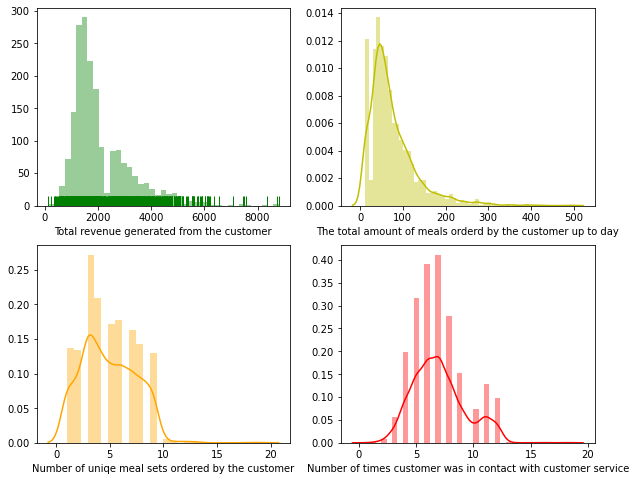

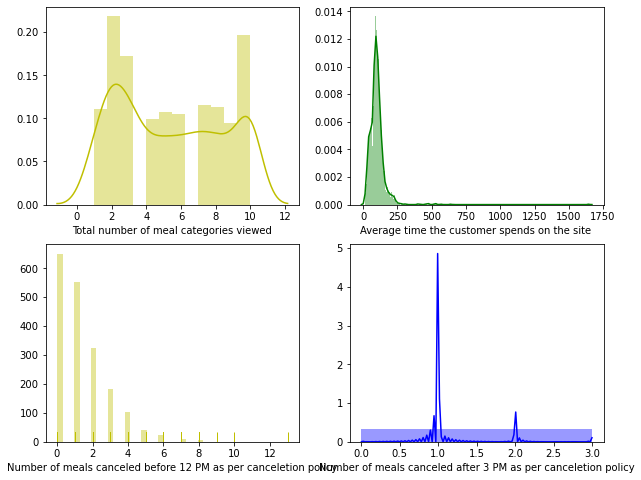

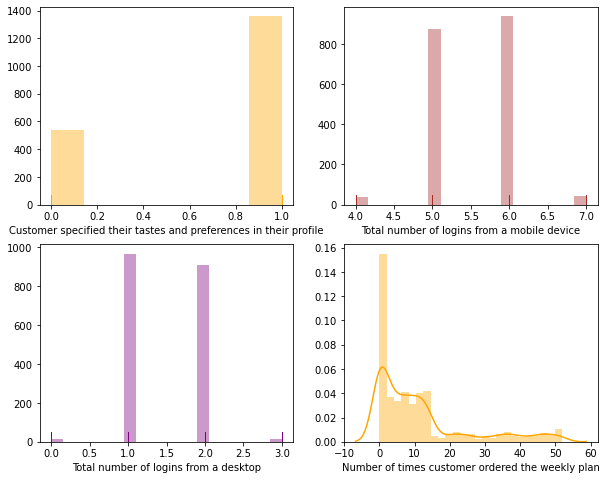

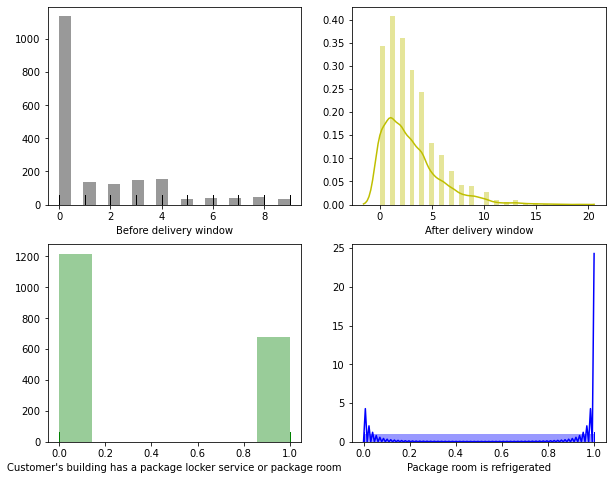

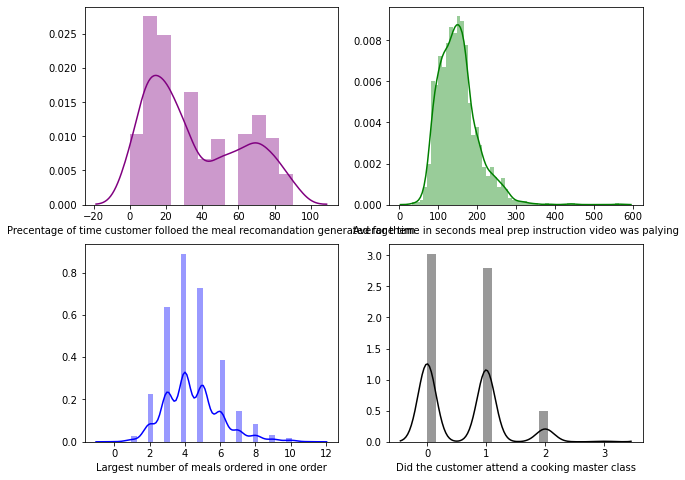

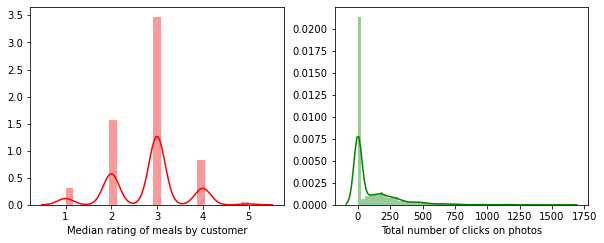

In [12]:
# OUTLIER ANALYSIS

# Plot 1 - cross_sell_success
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot (2, 2, 1)
sns.distplot(my_df_dropped['REVENUE'], bins = 'fd', kde = False, rug = True, color = 'g')
plt.xlabel('Total revenue generated from the customer')

# Plot 2 - total_meals_ordered
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['TOTAL_MEALS_ORDERED'], bins = 'fd', color = 'y')
plt.xlabel('The total amount of meals orderd by the customer up to day')

#Plot 3 - unique_meals_purch
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['UNIQUE_MEALS_PURCH'], bins = 'fd', color = 'orange')
plt.xlabel('Number of uniqe meal sets ordered by the customer')

#Plot 4 - contacts_w_customer_service
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'], bins = 'fd', color = 'r')
plt.xlabel('Number of times customer was in contact with customer service')

#Plot 5 - product_categories_viewed
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['PRODUCT_CATEGORIES_VIEWED'], bins = 'fd', color = 'y')
plt.xlabel('Total number of meal categories viewed')

#Plot 6 - avg_time_per_site_visit
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['AVG_TIME_PER_SITE_VISIT'], bins = 'fd', color = 'g')
plt.xlabel('Average time the customer spends on the site ')

#Plot 7 - cancellations_before_noon
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['CANCELLATIONS_BEFORE_NOON'], bins = 'fd', kde = False, rug = True, color = 'y')
plt.xlabel('Number of meals canceled before 12 PM as per canceletion policy')

#Plot 8 - cancellations_after_noon
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['CANCELLATIONS_AFTER_NOON'], bins = 'fd', color = 'blue')
plt.xlabel('Number of meals canceled after 3 PM as per canceletion policy')

#Plot 9 - tastes_and_preferences
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['TASTES_AND_PREFERENCES'], bins = 'fd', kde = False, rug = True, color = 'orange')
plt.xlabel('Customer specified their tastes and preferences in their profile')

#Plot 10 - mobile_logins
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['MOBILE_LOGINS'], bins = 'fd', kde = False, rug = True, color = 'brown')
plt.xlabel('Total number of logins from a mobile device')

#Plot 11 - pc_logins
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['PC_LOGINS'], bins = 'fd', kde = False, rug = True, color = 'purple')
plt.xlabel('Total number of logins from a desktop')

#Plot 12 - weekly_plan
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['WEEKLY_PLAN'], bins = 'fd', color = 'orange')
plt.xlabel('Number of times customer ordered the weekly plan')

#Plot 13 - early_deliveries
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['EARLY_DELIVERIES'], bins = 'fd', kde = False, rug = True, color = 'black')
plt.xlabel('Before delivery window')

#Plot 14 - late_deliveries
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['LATE_DELIVERIES'], bins = 'fd', color = 'y')
plt.xlabel('After delivery window')

#Plot 15 - package_locker
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['PACKAGE_LOCKER'], bins = 'fd', kde = False, rug = True, color = 'g')
plt.xlabel("Customer's building has a package locker service or package room")

#Plot 16 - refrigerated_locker
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['REFRIGERATED_LOCKER'], bins = 'fd', rug = True, norm_hist = False, color = 'blue')
plt.xlabel('Package room is refrigerated')

#Plot 17 - followed_recommendations_pct
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['FOLLOWED_RECOMMENDATIONS_PCT'], bins = 'fd', color = 'purple')
plt.xlabel('Precentage of time customer folloed the meal recomandation generated for them')

#Plot 18 - avg_prep_vid_time
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['AVG_PREP_VID_TIME'], bins = 'fd', color = 'g')
plt.xlabel('Average time in seconds meal prep instruction video was palying')

#Plot 19 - largest_order_size
plt.subplot(2, 2, 3)
sns.distplot(my_df_dropped['LARGEST_ORDER_SIZE'], bins = 'fd', color = 'blue')
plt.xlabel('Largest number of meals ordered in one order')

#Plot 20 - master_classes_attended
plt.subplot(2, 2, 4)
sns.distplot(my_df_dropped['MASTER_CLASSES_ATTENDED'], bins = 'fd', color = 'black')
plt.xlabel('Did the customer attend a cooking master class')

#Plot 21 - median_meal_rating
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_df_dropped['MEDIAN_MEAL_RATING'], bins = 'fd', color = 'red')
plt.xlabel('Median rating of meals by customer')

#Plot 22 - total_photos_viewed
plt.subplot(2, 2, 2)
sns.distplot(my_df_dropped['TOTAL_PHOTOS_VIEWED'], bins = 'fd', color = 'g')
plt.xlabel('Total number of clicks on photos')
plt.show()

The output above shows the distribution of values for each numerical variable. Some of the variables are binary, and some are continuous. Many variables have lower and upper outliers. 

I have already described my approach to analyzing outliers for each variable earlier. Now that I have visually identified outliers for all variables, I will answer an important question - how did I determine my outliers?

<b>How to identify outliers?</b>

The beauty of analyzing outliers is that there is no perfect method to use. In other words, every person may identify outliers at different values. In the above example, I used my common sense to determine specific value ranges for my outliers. Another data scientist may identify outliers at differently, because every person has their own interpretation of where the majority range and outlier ranges border. Therefore, as long as you identify outliers using logic, others are very unlikely to question your approach.

Now that I determined my outliers, I will flag them at specific thresholds in the next code block.

In [13]:
##############################
# Setting outlier thresholds #
##############################
revenue_lo = 800
revenue_hi = 2400
total_meals_ordered_hi = 150
unique_meals_purch_hi = 10
contacts_w_customer_service_lo = 3
contacts_w_customer_service_hi = 10
avg_time_per_site_visit_hi = 180
cancellations_before_noon_hi = 3
cancellations_after_noon_hi = 1
mobile_logins_lo = 4
mobile_logins_hi = 7
pc_logins_lo = 0
pc_logins_hi = 3
weekly_plan_hi = 15
early_deliveries_hi = 5
late_deliveries_hi = 5
refrigerated_locker_hi = 1
avg_prep_vid_time_lo = 70
avg_prep_vid_time_hi = 220
largest_order_size_lo = 2
largest_order_size_hi = 7
master_classes_attended_hi = 2
median_meal_rating_lo = 1
median_meal_rating_hi = 5
avg_clicks_per_visit_lo = 10
avg_clicks_per_visit_hi = 18
total_photos_viewed_hi = 1

Now that I have determined thresholds, I can use them to create new variables that will store outliers. This will ensure outliers will be considered as valuable of information as ranges containing majority values across numeric columns.

In the next code block, I will create new variables that will store the values of outliers based on thresholds identified above.

In [14]:
# Creating columns to flag outliers

# Revenue
my_df_dropped['OUT_REVENUE'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_REVENUE'][my_df_dropped['REVENUE'] >= revenue_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_REVENUE'][my_df_dropped['REVENUE'] <= revenue_lo]
my_df_dropped['OUT_REVENUE'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_REVENUE'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Total_meals_ordered
my_df_dropped['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_TOTAL_MEALS_ORDERED'][my_df_dropped['TOTAL_MEALS_ORDERED'] >= total_meals_ordered_hi]
my_df_dropped['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Unique_meals_purch
my_df_dropped['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_UNIQUE_MEALS_PURCH'][my_df_dropped['UNIQUE_MEALS_PURCH'] >= unique_meals_purch_hi]
my_df_dropped['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Contacts_w_customer_service
my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'] >= contacts_w_customer_service_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_df_dropped['CONTACTS_W_CUSTOMER_SERVICE'] <= contacts_w_customer_service_lo]
my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Avg_time_per_site_visit
my_df_dropped['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_AVG_TIME_PER_SITE_VISIT'][my_df_dropped['AVG_TIME_PER_SITE_VISIT'] >= avg_time_per_site_visit_hi]
my_df_dropped['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Cancellations_before_noon
my_df_dropped['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_CANCELLATIONS_BEFORE_NOON'][my_df_dropped['CANCELLATIONS_BEFORE_NOON'] >= cancellations_before_noon_hi]
my_df_dropped['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Cancellations_after_noon
my_df_dropped['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_CANCELLATIONS_AFTER_NOON'][my_df_dropped['CANCELLATIONS_AFTER_NOON'] >= cancellations_after_noon_hi]
my_df_dropped['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Mobile_logins
my_df_dropped['OUT_MOBILE_LOGINS'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_MOBILE_LOGINS'][my_df_dropped['MOBILE_LOGINS'] >= mobile_logins_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_MOBILE_LOGINS'][my_df_dropped['MOBILE_LOGINS'] <= mobile_logins_lo]
my_df_dropped['OUT_MOBILE_LOGINS'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_MOBILE_LOGINS'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Pc_logins
my_df_dropped['OUT_PC_LOGINS'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_PC_LOGINS'][my_df_dropped['PC_LOGINS'] >= pc_logins_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_PC_LOGINS'][my_df_dropped['PC_LOGINS'] <= pc_logins_lo]
my_df_dropped['OUT_PC_LOGINS'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_PC_LOGINS'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Weekly_plan
my_df_dropped['OUT_WEEKLY_PLAN'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_WEEKLY_PLAN'][my_df_dropped['WEEKLY_PLAN'] >= weekly_plan_hi]
my_df_dropped['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Early_deliveries
my_df_dropped['OUT_EARLY_DELIVERIES'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_EARLY_DELIVERIES'][my_df_dropped['EARLY_DELIVERIES'] >= early_deliveries_hi]
my_df_dropped['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Late_deliveries
my_df_dropped['OUT_LATE_DELIVERIES'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_LATE_DELIVERIES'][my_df_dropped['LATE_DELIVERIES'] >= late_deliveries_hi]
my_df_dropped['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Refrigerated_locker
my_df_dropped['OUT_REFRIGERATED_LOCKER'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_REFRIGERATED_LOCKER'][my_df_dropped['REFRIGERATED_LOCKER'] >= refrigerated_locker_hi]
my_df_dropped['OUT_REFRIGERATED_LOCKER'].replace(to_replace = condition_hi, value = 1, inplace = True)
 
# Avg_prep_vid_time
my_df_dropped['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_AVG_PREP_VID_TIME'][my_df_dropped['AVG_PREP_VID_TIME'] >= avg_prep_vid_time_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_AVG_PREP_VID_TIME'][my_df_dropped['AVG_PREP_VID_TIME'] <= avg_prep_vid_time_lo]
my_df_dropped['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Largest_order_size
my_df_dropped['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_LARGEST_ORDER_SIZE'][my_df_dropped['LARGEST_ORDER_SIZE'] >= largest_order_size_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_LARGEST_ORDER_SIZE'][my_df_dropped['LARGEST_ORDER_SIZE'] <= largest_order_size_lo]
my_df_dropped['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Master_classes_attended
my_df_dropped['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_MASTER_CLASSES_ATTENDED'][my_df_dropped['MASTER_CLASSES_ATTENDED'] >= master_classes_attended_hi]
my_df_dropped['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi, value = 1, inplace = True)

# Median_meal_rating
my_df_dropped['OUT_MEDIAN_MEAL_RATING'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_MEDIAN_MEAL_RATING'][my_df_dropped['MEDIAN_MEAL_RATING'] >= median_meal_rating_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_MEDIAN_MEAL_RATING'][my_df_dropped['MEDIAN_MEAL_RATING'] <= median_meal_rating_lo]
my_df_dropped['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Avg_clicks_per_visit
my_df_dropped['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_AVG_CLICKS_PER_VISIT'][my_df_dropped['AVG_CLICKS_PER_VISIT'] >= avg_clicks_per_visit_hi]
condition_lo = my_df_dropped.loc[0:, 'OUT_AVG_CLICKS_PER_VISIT'][my_df_dropped['AVG_CLICKS_PER_VISIT'] <= avg_clicks_per_visit_lo]
my_df_dropped['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi, value = 1, inplace = True)
my_df_dropped['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo, value = 1, inplace = True)

# Total_photos_viewed
my_df_dropped['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = my_df_dropped.loc[0:, 'OUT_TOTAL_PHOTOS_VIEWED'][my_df_dropped['TOTAL_PHOTOS_VIEWED'] >= total_photos_viewed_hi]
my_df_dropped['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi, value = 1, inplace = True)

/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Now that I have created new variables to flag outliers, I made sure that majority values and outliers will be evaluated as equally important. 

Until I evaluate the importance of each explanatory variable against my response variable - CROSS_SELL_SUCCESS - I have no way of knowing what variables will turn out to be important predictors of customers subscribing to a new service. Therefore, it is a good practice to perform feature engineering with great attention to detail and have as much information as possible (a.k.a. as many variables as possible). This concludes my outlier analysis. 

___

### Building Predictive Models

Before I build predictive models,  I will observe the results of my feature engineering analysis. To do that, I will change the naming convention of my data and develop a code to view a Pearson correlation matrix with data rounded to 2 decimal places. 

In [15]:
my_df = my_df_dropped

In [16]:
# Understanding the correlations between CROSS_SELL_SUCCESS and other columns
my_df_corr = my_df.corr().round(2)
print(my_df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                 1.00
FOLLOWED_RECOMMENDATIONS_PCT       0.47
CANCELLATIONS_BEFORE_NOON          0.16
OUT_CANCELLATIONS_BEFORE_NOON      0.13
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
OUT_REFRIGERATED_LOCKER            0.07
PACKAGE_LOCKER                     0.04
MOBILE_LOGINS                      0.04
MASTER_CLASSES_ATTENDED            0.04
CONTACTS_W_CUSTOMER_SERVICE        0.04
MEDIAN_MEAL_RATING                 0.03
AVG_PREP_VID_TIME                  0.03
EARLY_DELIVERIES                   0.02
OUT_EARLY_DELIVERIES               0.02
LARGEST_ORDER_SIZE                 0.02
AVG_TIME_PER_SITE_VISIT            0.01
TOTAL_MEALS_ORDERED                0.01
REVENUE                            0.01
OUT_LATE_DELIVERIES                0.01
OUT_CONTACTS_W_CUSTOMER_SERVICE    0.01
OUT_TOTAL_PHOTOS_VIEWED            0.00
OUT_MASTER_CLASSES_ATTENDED        0.00
OUT_AVG_PREP_VID_TIME             -0.00


From the results above, I notice that the "m_FAMILY_NAME" column returns "NaN" value for correlation. This can cause me troubles in my analysis later. Therefore, I will next drop that variable from my data, and re-run the Pearson correlation matrix.

In [17]:
my_df = my_df.drop(["m_FAMILY_NAME"], axis = 1)
my_df_corr = my_df.corr().round(2)
print(my_df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                 1.00
FOLLOWED_RECOMMENDATIONS_PCT       0.47
CANCELLATIONS_BEFORE_NOON          0.16
OUT_CANCELLATIONS_BEFORE_NOON      0.13
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
OUT_REFRIGERATED_LOCKER            0.07
PACKAGE_LOCKER                     0.04
MOBILE_LOGINS                      0.04
MASTER_CLASSES_ATTENDED            0.04
CONTACTS_W_CUSTOMER_SERVICE        0.04
MEDIAN_MEAL_RATING                 0.03
AVG_PREP_VID_TIME                  0.03
EARLY_DELIVERIES                   0.02
OUT_EARLY_DELIVERIES               0.02
LARGEST_ORDER_SIZE                 0.02
AVG_TIME_PER_SITE_VISIT            0.01
TOTAL_MEALS_ORDERED                0.01
REVENUE                            0.01
OUT_LATE_DELIVERIES                0.01
OUT_CONTACTS_W_CUSTOMER_SERVICE    0.01
OUT_TOTAL_PHOTOS_VIEWED            0.00
OUT_MASTER_CLASSES_ATTENDED        0.00
OUT_AVG_PREP_VID_TIME             -0.00


All Pearson correlation values are now valid, and I will next drop the columns that cannot be used in the further analysis. These are variables of type "object", which cannot help address my business question of <b> predicting which customers will subscribe to the Halfway There service</b>.

In [18]:
# dropping variables deemed irrelevant for classification analysis
my_df = my_df.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)

Next, I will drop the response variable from the dataset for now. After, I will run a for loop to print my explanatory variables that will be easy to copy-paste in my analysis later. 

In [19]:
# dropping CROSS_SELL_SUCCESS variable from the explanatory variable set
my_df_data = my_df.drop(['CROSS_SELL_SUCCESS'], axis = 1)

# declaring response variable
my_df_target = my_df.loc[:, 'CROSS_SELL_SUCCESS']

# formatting each explanatory variable for statsmodels
for val in my_df_data:
    print(f"my_df['{val}'] +")

my_df['REVENUE'] +
my_df['TOTAL_MEALS_ORDERED'] +
my_df['UNIQUE_MEALS_PURCH'] +
my_df['CONTACTS_W_CUSTOMER_SERVICE'] +
my_df['PRODUCT_CATEGORIES_VIEWED'] +
my_df['AVG_TIME_PER_SITE_VISIT'] +
my_df['MOBILE_NUMBER'] +
my_df['CANCELLATIONS_BEFORE_NOON'] +
my_df['CANCELLATIONS_AFTER_NOON'] +
my_df['TASTES_AND_PREFERENCES'] +
my_df['MOBILE_LOGINS'] +
my_df['PC_LOGINS'] +
my_df['WEEKLY_PLAN'] +
my_df['EARLY_DELIVERIES'] +
my_df['LATE_DELIVERIES'] +
my_df['PACKAGE_LOCKER'] +
my_df['REFRIGERATED_LOCKER'] +
my_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
my_df['AVG_PREP_VID_TIME'] +
my_df['LARGEST_ORDER_SIZE'] +
my_df['MASTER_CLASSES_ATTENDED'] +
my_df['MEDIAN_MEAL_RATING'] +
my_df['AVG_CLICKS_PER_VISIT'] +
my_df['TOTAL_PHOTOS_VIEWED'] +
my_df['OUT_REVENUE'] +
my_df['OUT_TOTAL_MEALS_ORDERED'] +
my_df['OUT_UNIQUE_MEALS_PURCH'] +
my_df['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
my_df['OUT_AVG_TIME_PER_SITE_VISIT'] +
my_df['OUT_CANCELLATIONS_BEFORE_NOON'] +
my_df['OUT_CANCELLATIONS_AFTER_NOON'] +
my_df['OUT_MOB

Next, I will execute the train-test split and stratify my response variable. After that, I will merge explanatory and response variables together again to use in the analysis later.

In [20]:
# train-test split with stratification
X_train, y_train, X_test, y_test = train_test_split(
            my_df_data,
            my_df_target,
            test_size = 0.25,
            random_state = 508,
            stratify = my_df_target)


# merging training data for statsmodels
my_df_train = pd.concat([X_train, y_train], axis = 1)

Below, I will run the full Logistic Regression model containing all explanatory variables.

In [21]:
# Building a full model

# creating a model by removing one insignificant variable at a time
logit_full = smf.logit(formula = """
my_df['CROSS_SELL_SUCCESS'] ~
                          my_df['REVENUE'] +
                          my_df['TOTAL_MEALS_ORDERED'] +
                          my_df['UNIQUE_MEALS_PURCH'] +
                          my_df['CONTACTS_W_CUSTOMER_SERVICE'] +
                          my_df['PRODUCT_CATEGORIES_VIEWED'] +
                          my_df['AVG_TIME_PER_SITE_VISIT'] +
                          my_df['MOBILE_NUMBER'] +
                          my_df['CANCELLATIONS_BEFORE_NOON'] +
                          my_df['CANCELLATIONS_AFTER_NOON'] +
                          my_df['TASTES_AND_PREFERENCES'] +
                          my_df['MOBILE_LOGINS'] +
                          my_df['PC_LOGINS'] +
                          my_df['WEEKLY_PLAN'] +
                          my_df['EARLY_DELIVERIES'] +
                          my_df['LATE_DELIVERIES'] +
                          my_df['PACKAGE_LOCKER'] +
                          my_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
                          my_df['AVG_PREP_VID_TIME'] +
                          my_df['LARGEST_ORDER_SIZE'] +
                          my_df['MASTER_CLASSES_ATTENDED'] +
                          my_df['TOTAL_PHOTOS_VIEWED'] +
                          my_df['OUT_TOTAL_MEALS_ORDERED'] +
                          my_df['OUT_UNIQUE_MEALS_PURCH'] +
                          my_df['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
                          my_df['OUT_AVG_TIME_PER_SITE_VISIT'] +
                          my_df['OUT_CANCELLATIONS_BEFORE_NOON'] +
                          my_df['OUT_CANCELLATIONS_AFTER_NOON'] +
                          my_df['OUT_MOBILE_LOGINS'] +
                          my_df['OUT_PC_LOGINS'] +
                          my_df['OUT_WEEKLY_PLAN'] +
                          my_df['OUT_EARLY_DELIVERIES'] +
                          my_df['OUT_LATE_DELIVERIES'] +
                          my_df['OUT_REFRIGERATED_LOCKER'] +
                          my_df['OUT_AVG_PREP_VID_TIME'] +
                          my_df['OUT_LARGEST_ORDER_SIZE'] +
                          my_df['OUT_MASTER_CLASSES_ATTENDED'] +
                          my_df['OUT_MEDIAN_MEAL_RATING'] +
                          my_df['OUT_AVG_CLICKS_PER_VISIT'] +
                          my_df['OUT_TOTAL_PHOTOS_VIEWED']
""",
                                data = my_df)

# telling Python to run the data through the blueprint
results_full = logit_full.fit()


# printing the results
results_full.summary()

# this is a full model with all variables. We clearly see that there are 
# multiple variables that are statistically insignificant. Therefore, our
# next step is to polish our model to only include important variables

Optimization terminated successfully.
         Current function value: 0.462745
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     my_df['CROSS_SELL_SUCCESS']   No. Observations:                 1899
Model:                                   Logit   Df Residuals:                     1859
Method:                                    MLE   Df Model:                           39
Date:                         Mon, 27 Apr 2020   Pseudo R-squ.:                  0.2638
Time:                                 09:30:21   Log-Likelihood:                -878.75
converged:                                True   LL-Null:                       -1193.7
Covariance Type:                     nonrobust   LLR p-value:                1.090e-107
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.8371      0.740     -5.184      0.000      -5.288      -2.386
my_df['REVENUE']                         -9.158e-05   8.58e-05     -1.068      0.286      -0.000    7.65e-05
my_df['TOTAL_MEALS_ORDERED']                 0.0029      0.002      1.453      0.146      -0.001       0.007
my_df['UNIQUE_MEALS_PURCH']                 -0.0039      0.026     -0.153      0.879      -0.054       0.046
my_df['CONTACTS_W_CUSTOMER_SERVICE']         0.0139      0.032      0.433      0.665      -0.049       0.077
my_df['PRODUCT_CATEGORIES_VIEWED']           0.0036      0.020      0.186      0.853      -0.035       0.042
my_df['AVG_TIME_PER_SITE_VISIT']             0.0025      0.001      1.803      0.071      -0.000       0.005
my_df['MOBILE_NUMBER']                       0.7112      0.176      4.047      0.000       0.367       1.056
my_df['CANCELLATIONS_BEFORE_NOON']           0.3127      0.072      4.335      0.000       0.171       0.454
my_df['CANCELLATIONS_AFTER_NOON']           -0.3121      0.390     -0.800      0.424      -1.077       0.453
my_df['TASTES_AND_PREFERENCES']              0.4731      0.129      3.655      0.000       0.219       0.727
my_df['MOBILE_LOGINS']                       0.2252      0.101      2.232      0.026       0.027       0.423
my_df['PC_LOGINS']                          -0.2856      0.112     -2.561      0.010      -0.504      -0.067
my_df['WEEKLY_PLAN']                        -0.0134      0.009     -1.514      0.130      -0.031       0.004
my_df['EARLY_DELIVERIES']                    0.0677      0.043      1.579      0.114      -0.016       0.152
my_df['LATE_DELIVERIES']                    -0.0309      0.036     -0.860      0.390      -0.101       0.040
my_df['PACKAGE_LOCKER']                      0.0415      0.141      0.295      0.768      -0.234       0.317
my_df['FOLLOWED_RECOMMENDATIONS_PCT']        0.0587      0.003     17.181      0.000       0.052       0.065
my_df['AVG_PREP_VID_TIME']                   0.0029      0.003      1.058      0.290      -0.002       0.008
my_df['LARGEST_ORDER_SIZE']                 -0.0034      0.066     -0.052      0.959      -0.132       0.126
my_df['MASTER_CLASSES_ATTENDED']             0.0601      0.143      0.420      0.675      -0.220       0.341
my_df['TOTAL_PHOTOS_VIEWED']                -0.0007      0.001     -1.363      0.173      -0.002       0.000
my_df['OUT_TOTAL_MEALS_ORDERED']            -0.3754      0.344     -1.091      0.275      -1.050       0.299
my_df['OUT_UNIQUE_MEALS_PURCH']             -0.2950      0.629     -0.469      0.639      -1.528       0.938
my_df['OUT_CONTACTS_W_CUSTOMER_SERVICE']     0.0613      0.201      0.306      0.760      -0.332       0.454
my_df['OUT_AVG_TIME_PER_SITE_VISIT']        -0.5197      0.348     -1.492      0.136      -1.202       0.163

According to the p-values of each variable, some variables are statistically significant, and others are not. Statistically significant variables have p-values of 0.05 or lower. Variables that have p-values above 0.05 are deemed statistically insignificant, and I will therefore remove them one by one, starting with the variable with the highest p-value. After each time I will remove a variable, I will re-run the code above to see how p-values change with decreased number of variables. I will continue this process until only statistically significant variables remain.

In [22]:
# Building a full model

# creating a model by removing one insignificant variable at a time
logit_sig = smf.logit(formula = """
my_df['CROSS_SELL_SUCCESS'] ~
                           my_df['MOBILE_NUMBER'] +
                           my_df['CANCELLATIONS_BEFORE_NOON'] +
                           my_df['TASTES_AND_PREFERENCES'] +
                           my_df['MOBILE_LOGINS'] +
                           my_df['PC_LOGINS'] +
                           my_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
                           my_df['OUT_REFRIGERATED_LOCKER']
""",
                                data = my_df)

# telling Python to run the data through the blueprint
results_full = logit_sig.fit()


# printing the results
results_full.summary()

# after removing many statistically insignificant variables, this is the 
# final formula with all p-values below 0.05

Optimization terminated successfully.
         Current function value: 0.471118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     my_df['CROSS_SELL_SUCCESS']   No. Observations:                 1899
Model:                                   Logit   Df Residuals:                     1891
Method:                                    MLE   Df Model:                            7
Date:                         Mon, 27 Apr 2020   Pseudo R-squ.:                  0.2505
Time:                                 09:30:21   Log-Likelihood:                -894.65
converged:                                True   LL-Null:                       -1193.7
Covariance Type:                     nonrobust   LLR p-value:                6.532e-125
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -2.9308      0.611     -4.793      0.000      -4.129      -1.732
my_df['MOBILE_NUMBER']                    0.6417      0.170      3.766      0.000       0.308       0.976
my_df['CANCELLATIONS_BEFORE_NOON']        0.2523      0.042      5.962      0.000       0.169       0.335
my_df['TASTES_AND_PREFERENCES']           0.4767      0.126      3.778      0.000       0.229       0.724
my_df['MOBILE_LOGINS']                    0.2164      0.099      2.177      0.029       0.022       0.411
my_df['PC_LOGINS']                       -0.2626      0.109     -2.409      0.016      -0.476      -0.049
my_df['FOLLOWED_RECOMMENDATIONS_PCT']     0.0569      0.003     17.196      0.000       0.050       0.063
my_df['OUT_REFRIGERATED_LOCKER']          0.4660      0.196      2.375      0.018       0.081       0.850
=========================================================================================================
"""

The summary above shows that the model now only contains statistically significant variables.

In the next code, I will define 2 dictionaries that I will be referring to later. The first dictionary - <i> logit_full </i> - contains all explanatory variables. The second dictionary - <i> logit_sig </i> - only contains statistically significant explanatory vairables.

In [23]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
                   'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
                   'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
                   'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 
                   'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
                   'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
                   'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
                   'TOTAL_PHOTOS_VIEWED', 'OUT_TOTAL_MEALS_ORDERED', 
                   'OUT_UNIQUE_MEALS_PURCH', 'OUT_CONTACTS_W_CUSTOMER_SERVICE',
                   'OUT_AVG_TIME_PER_SITE_VISIT', 'OUT_CANCELLATIONS_BEFORE_NOON', 
                   'OUT_CANCELLATIONS_AFTER_NOON', 'OUT_MOBILE_LOGINS', 
                   'OUT_PC_LOGINS', 'OUT_WEEKLY_PLAN', 'OUT_EARLY_DELIVERIES',
                   'OUT_LATE_DELIVERIES', 'OUT_REFRIGERATED_LOCKER',
                   'OUT_AVG_PREP_VID_TIME', 'OUT_LARGEST_ORDER_SIZE',
                   'OUT_MASTER_CLASSES_ATTENDED', 'OUT_MEDIAN_MEAL_RATING',
                   'OUT_AVG_CLICKS_PER_VISIT', 'OUT_TOTAL_PHOTOS_VIEWED', 
                   'CHANGE_TOTAL_MEALS_ORDERED', 'CHANGE_AVG_TIME_PER_SITE_VISIT',
                   'CHANGE_WEEKLY_PLAN'],
    
 # significant variables only
 'logit_sig'    : ['MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON', 
                   'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 
                   'FOLLOWED_RECOMMENDATIONS_PCT', 'OUT_REFRIGERATED_LOCKER']

}

Now that I have determined the dictionaries, I will next score the performance of Logistic Regression and analyze its performance.

In [24]:
# train/test split with the significant model
my_df_data   =  my_df.loc[ : , candidate_dict['logit_sig']]
my_df_target =  my_df.loc[ : , 'CROSS_SELL_SUCCESS']


# defining the training and testing code with appropriate data, target, 
# rndom state, test size, and stratification
X_train, X_test, y_train, y_test = train_test_split(
            my_df_data,
            my_df_target,
            random_state = 802,
            test_size    = 0.25,
            stratify     = my_df_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 802)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# Printing the confusion matrix
print("Confusion matrix results")
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred)) 

# Printing the AUC score
print("The AUC score:", roc_auc_score(y_true  = y_test,
                                      y_score = logreg_pred).round(4))

Training ACCURACY: 0.71
Testing  ACCURACY: 0.7411
Confusion matrix results
[[ 83  70]
 [ 53 269]]
The AUC score: 0.6889


/Users/arseniybarmin/.conda/envs/blue/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Logistic Regression model gives me the training score of 0.71 and the testing score of 0.7411. I will now show the framework I will use to analyze all the models in this project using the example of Logistic Regression model.

<b>How do I read the training score?</b>

The training score for the Logistic Regression model is 0.71. This tells me that my model was 71% accurate in training on my training set. I consider 71% to be a good number; at a minimum, I want my model to show 70% accuracy or more, given my current knowledge of machine learning. There is no specific number that is a rule of thumb for testing performance; 70% is what I identified for myself using my own judgment.

<b>How do I read the testing score?</b>

The testing score for the Logistic Regression model is 0.7411. This tells me that my model was 74% accurate in correctly predicting customers' likelihood to subscribe to a new service. 74% prediction accuracy is good, and again, there is no specific rule of thumb as to what % of prediction accuracy is deemed great. Based on my machine learning skills I developed over the past 2 months, I want my prediction accuracy to be at a rate of 70% or more.

<b>How do I read the combination of training and testing performance?</b>

The training performance and the testing performance are both very close to one another. This tells me that Logistic Regression model is not over-fit, and it is not under-fit. Therefore, this model can be considered to potentially be my final model.

<b>What does it mean when a model is over-fit?</b>

A model is considered over-fit when the training score is higher than the testing score by 0.06 or more. If a model is over-fit, it means that a model trained well on the data, but predicted significantly worse. A model needs to be able to generalize across the training set to capture relevant trends. However, it can happen that a model is not able to generalize, and instead tries to capture as much information as it can when it trains. This makes a model vulnerable to the noise in the training data. By noise, I mean that the model tries to learn from  data points that are far from the general trend in the training set. In this case, the model over-generalizes, and learns too much when training. Conclusively, over-fitting takes place when a model is trying to learn too much from the training set, rather than generalizing relevant trends and patterns. 

<b> What does it mean when a model is under-fit?</b>

A model is under-fit when the testing score is higher than the training score by 0.06 or more. In this case, it means that a model may have missed on some trends and patterns in the training data, which can jeopardize the predicting performance on the longer-term. Under-fitting happens much less often than over-fitting.

<b> Why is it important to consider over-fitting and under-fitting?</b>

Machine learning models are created to be deployed in production environments. If a model is over-fit, it means it failed to generalize trends and patterns well. In this case, a model will perform poor on predictions. Even if it does well at first, as in the case of under-fitting, the model will at some point backfire and return poor results. In business context, this means that the model can make many false business decisions and ultimately destroy a business. Therefore, it is very important to make sure that the model is neither over-fit, nor under-fit, prior to deploying it in production.

<b> How do I interpret confusion matrix?</b>

The Logistic Regression model outputs 269 True Positive results and 83 True Negative results. This means that 269 times the model correctly predicted a person signed up for the new service, and 83 times the model correctly predicted a person did not sign up for a new service. The model incorrectly predicted on 123 occasions out of 475 total occasions, which is 26%. This is a decent result, but I believe other models may output a better prediction rate, which is why I will test many more models and evaluate their performance. 

<b>How do I read the AUC score?</b>

The AUC score is 0.6889. This means that the model is 69% accurate in correctly predicting the class. In other words, it is 69% likely that a model will correctly predict a person will actually sign up for the new service, as well as it is 69% accurate in correctly predicting a person will not actually sign up for Halfway There program. The AUC score is very important in classification problems, which is why I consider 69% to be low. Based on my 2-months long experience in Machine Learning, I want my best model to achieve at lest 75% for the AUC score. 

<b> My conclusion of the Logistic Regression model </b>

Logistic Regression model is worthy model. This model trains with 71% accuracy and predicts with 74% accuracy. This model is neither over-fit, nor under-fit. In addition, the model's confusion matrix looks credible, but not good enough for my judgment. Lastly, the AUC score is lower than what I want to achieve, which is why I will continue to explore other models.


<b>I will apply the framework above to all machine learning models I will explore.</b>

Next, I will save my Logistic Regression model results as a data frame. I will use that later to easily compare different models.

In [25]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.71, 0.7411, 0.6889]


Now that Logistic Regression results are saved, I will next explore the k-Nearest Neighbors model. One of the arguments the KNN requires me to specify is the number of neighbors to use. Rather than trying different values and seeing which number of neighbors is the optimal one, I will next create a function that will help me automatically determine the number of neighbors I should use in my KNN model.

In [26]:
########################################
# optimal_neighbors ####################
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

Now that I have the function to determine the optimal number of neighbors for the KNN model, I will next plot and determine the number of neighbors I should use.

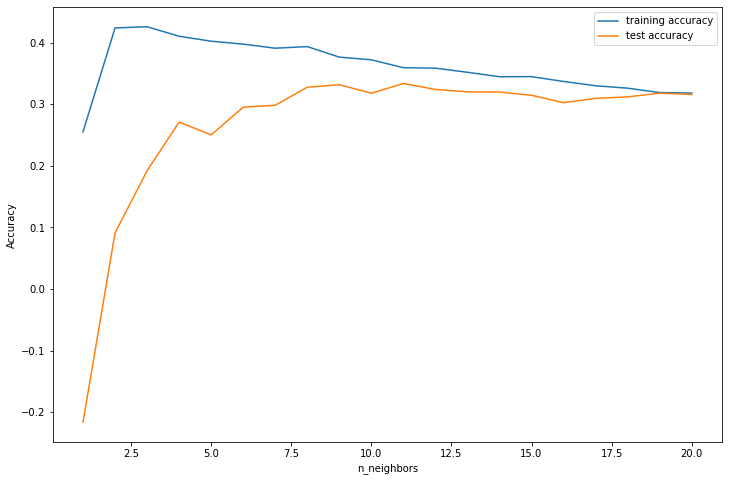

The optimal number of neighbors is: 11


In [27]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

The optimal number of neighbors to use is 11. Before I can use the KNN model, I need to scale my data and re-establish the train-test split function to use my scaled data on scale-sensitive models. 

In [28]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(my_df_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(my_df_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            my_df_target,
            random_state = 802,
            test_size = 0.25,
            stratify = my_df_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

# creating a confusion matrix
print(confusion_matrix(y_true = y_test_scaled,
                       y_pred = knn_pred))

Training ACCURACY: 0.7921
Testing  ACCURACY: 0.7411
AUC Score        : 0.7164
[[ 99  54]
 [ 69 253]]


The KNN model performs well. The model trains with 79% accuracy, and predicts the class of interest accurately 74% of the time. The model is neither over-fit, nor under-fit. Even though the difference between training and testing accuracies is 0.051, this can still be accepted. The AUC score is at 72%, which in my opinion should be greater than that; at least 75%. According to the confusion matrix, the KNN model accurately predicts the class 75% of the time, which is good, but in my opinion can be better, too. Altogether, the KNN is a good-performing model, but I will explore additional models to potentially find the one with better performance. 

In the next code, I will save the results of the KNN model for later use. 

In [29]:
# train accuracy
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)


# test accuracy
knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.71, 0.7411, 0.6889]
['KNN Classification', 0.7921, 0.7411, 0.7164]


Next, I will explore the CART model. At some point later, I will want to visualize the tree. Therefore, I will first create a user-defined function that will make it possible to display the tree.

In [30]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

Just as I will want to display a tree later, I will also want to visualize the feature importance chart. Therefore, the code below creates a user-defined function that will make that possible. 

In [31]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

Now that user-defined functions are loaded, I will next analyze the perfomrance of the full CART model.

In [32]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = full_tree_pred))

# AUC value
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(4)

Training ACCURACY: 0.8673
Testing  ACCURACY: 0.7158
AUC Score        : 0.6995
[[100  53]
 [ 82 240]]


The full-tree model is very over-fit; the difference between training and accuracy scores is way more than 0.05. This indicates that the tree needs to be pruned to perform better. Since this model will not be considered for production just because it is very over-fit, there is no need to discuss its AUC and confusion matrix performances. 

In the next code, I will save the performance of the full CART model for later use. 

In [33]:
# train accuracy
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(4)


# test accuracy
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(4)


# auc value
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(4)


# saving the results
model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.71, 0.7411, 0.6889]
['KNN Classification', 0.7921, 0.7411, 0.7164]
['Full Tree', 0.8673, 0.7158, 0.6995]


In the next code block, I will prune the tree to limit its maximum depth and minimum samples leaf to see if this will improve my model performance.

Training ACCURACY: 0.7893
Testing  ACCURACY: 0.7726
AUC Score        : 0.762
[[112  41]
 [ 67 255]]


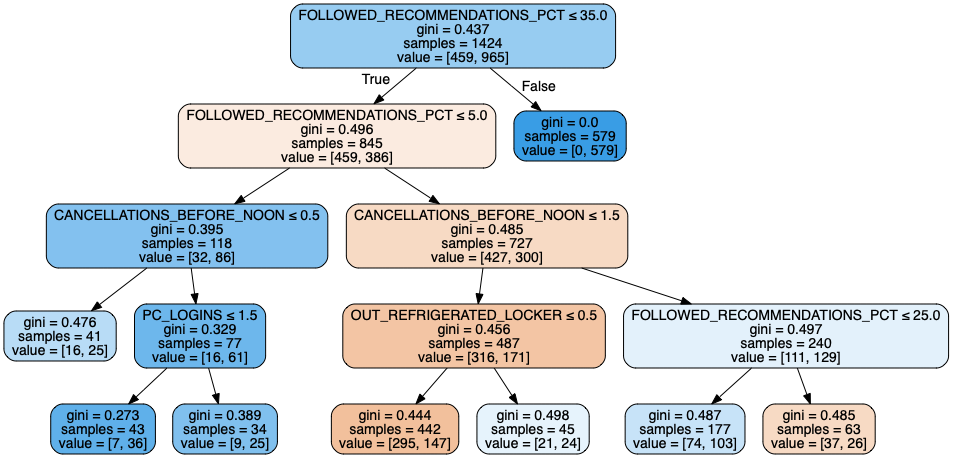

In [34]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = tree_pred))

# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

Pruned tree is my best performing model so far. It trains and tests at above 77%, and it is neither over-fit nor under-fit. In addition, its AUC score is at 76%, which is good compared to other models I tested so far. The confusion matrix results look great too; the model predicts our class of interest correctly 77% of the time, and it predicts the true positive just as well as true negative values. 

In the next code, I will analyze what features were the most important in predicting my class of interest - customers who will subscribe to a new service.

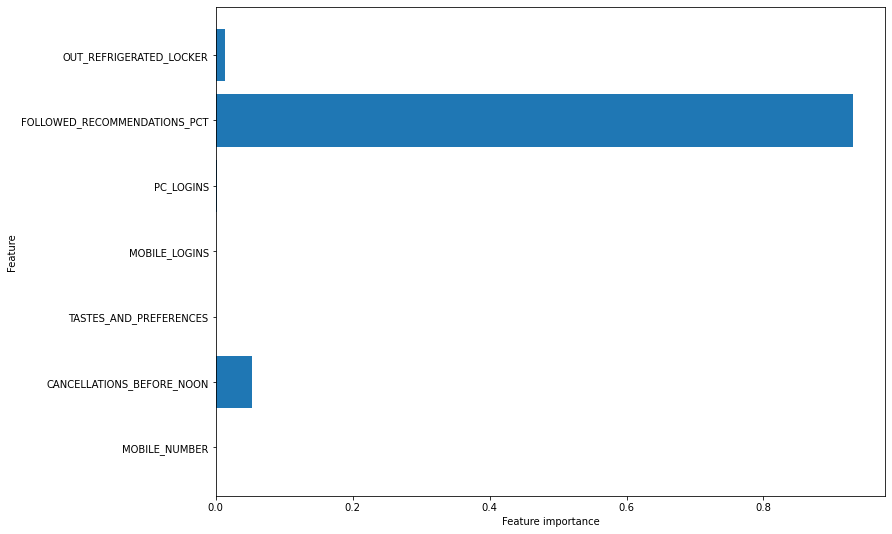

In [35]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

Interestingly, the FOLLOWED_RECOMMENDATIONS_PCT proved to be by far the most important explanatory variable for the pruned tree model in predicting the likelihood of customers subscribing to a new service. 

Next, I will save my results of the pruned tree for later use.

In [36]:
# train accuracy
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)


# test accuracy
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)


# auc value
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pred).round(4)


# saving the results
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7100,0.7411,0.6889
1,KNN Classification,0.7921,0.7411,0.7164
2,Full Tree,0.8673,0.7158,0.6995
3,Pruned Tree,0.7893,0.7726,0.7620


Next, I will explore the Ridge Classifier to see if it performs well or even better than the pruned tree model.

In [45]:
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.RidgeClassifier()

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', ridge_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', ridge_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = ridge_pred).round(4))

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = ridge_pred))

Training ACCURACY: 0.7135
Testing  ACCURACY: 0.7263
AUC Score        : 0.6592
[[ 72  81]
 [ 49 273]]


Ridge model performs well, but falls short of the pruned tree. It is neither over-fit nor under-fit, but its AUC score is very low. Notably, Ridge does very well in predicting our class of interest, even slightly better than the pruned tree. However, it is still an inferior model.

Next, I will save the model performance results for later use. 

In [38]:
# train accuracy
ridge_train_acc = ridge_fit.score(X_train, y_train).round(4)


# test accuracy
ridge_test_acc  = ridge_fit.score(X_test, y_test).round(4)


# auc value
ridge_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = ridge_pred).round(4)


# saving the results
model_performance.append(['Ridge',
                          ridge_train_acc,
                          ridge_test_acc,
                          ridge_auc])


# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7100,0.7411,0.6889
1,KNN Classification,0.7921,0.7411,0.7164
2,Full Tree,0.8673,0.7158,0.6995
3,Pruned Tree,0.7893,0.7726,0.7620
4,Ridge,0.7135,0.7263,0.6592


Next, I will test the Gaussian classifier to see how well it does in predicting customers' likelihood to subscribe to Apprentice Chef's new service.

In [44]:
# INSTANTIATING a model object
gauss_model = sklearn.gaussian_process.GaussianProcessClassifier()

# FITTING the training data
gauss_fit = gauss_model.fit(X_train, y_train)


# PREDICTING on new data
gauss_pred = gauss_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', gauss_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gauss_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gauss_pred).round(4))

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = gauss_pred))

Training ACCURACY: 0.8279
Testing  ACCURACY: 0.7432
AUC Score        : 0.7334
[[108  45]
 [ 77 245]]


Gaussian model is over-fit, and I therefore cannot consider it for possibly be deployed in production. Therefore, it is not worth discussing its AUC performance and the confusion matrix. Even though it is not a plausible model, I will still catalog its results for later use in the next code block.

In [40]:
# train accuracy
gauss_train_acc = gauss_fit.score(X_train, y_train).round(4)


# test accuracy
gauss_test_acc  = gauss_fit.score(X_test, y_test).round(4)


# auc value
gauss_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = gauss_pred).round(4)


# saving the results
model_performance.append(['Gaussian Classifier',
                          gauss_train_acc,
                          gauss_test_acc,
                          gauss_auc])


# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7100,0.7411,0.6889
1,KNN Classification,0.7921,0.7411,0.7164
2,Full Tree,0.8673,0.7158,0.6995
3,Pruned Tree,0.7893,0.7726,0.7620
4,Ridge,0.7135,0.7263,0.6592
5,Gaussian Classifier,0.8279,0.7432,0.7334


Next, I will save my model performance file as an Excel file in my working directory.

In [41]:
# declaring a DataFrame object
model_performance_df = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)

From all the models I ran above, pruned tree model proves to be the best performing model I tested in this analysis. In other words, it does best at predicting the likelihood of customers subscribing to a new service, which is the business question behind my analysis.

The pruned tree also yields an interesting insight, which is that the most important predictor turned out to be following the recommendation that platform provides to people. In business setting, I would dive deeper into that insight to see how exactly it can be optimized to increase the cross-selling opportunities. 